In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv('data/churn_train.csv')

In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [14]:
churn_df['last_trip_date'] = pd.to_datetime(churn_df['last_trip_date'])

In [15]:
churn_df['signup_date'] = pd.to_datetime(churn_df['signup_date'])

In [16]:
churn_df['phone'].fillna('Other', inplace = True)

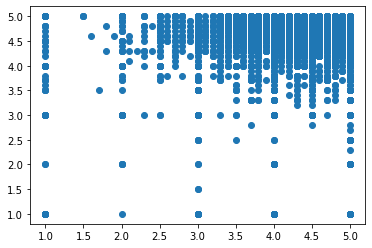

In [20]:
plt.scatter(churn_df['avg_rating_of_driver'], churn_df['avg_rating_by_driver'] )

In [28]:
churn_df['churn'] = churn_df['last_trip_date'] >= '2014-06-01'

In [35]:
basic_df = churn_df[pd.notna(churn_df['avg_rating_of_driver']) & pd.notna(churn_df['avg_rating_by_driver'])]

In [34]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                40000 non-null  float64       
 1   avg_rating_by_driver    39838 non-null  float64       
 2   avg_rating_of_driver    33472 non-null  float64       
 3   avg_surge               40000 non-null  float64       
 4   city                    40000 non-null  object        
 5   last_trip_date          40000 non-null  datetime64[ns]
 6   phone                   40000 non-null  object        
 7   signup_date             40000 non-null  datetime64[ns]
 8   surge_pct               40000 non-null  float64       
 9   trips_in_first_30_days  40000 non-null  int64         
 10  luxury_car_user         40000 non-null  bool          
 11  weekday_pct             40000 non-null  float64       
 12  churn                   40000 non-null  bool  

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
basic_rf = RandomForestClassifier()

In [42]:
X = basic_df.drop('churn', axis= 1)
y = basic_df['churn']

In [48]:
basic_rf.fit(X, y)

ValueError: could not convert string to float: 'Astapor'

In [43]:
scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall'}

In [45]:
from sklearn.model_selection import cross_validate





scores = cross_validate(basic_rf, X, y, scoring=scoring,
                         cv=10, return_train_score=True)
print(scores.keys())
print(scores['test_acc'])  

/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in i

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[nan nan nan nan nan nan nan nan nan nan]


/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in i